# L0 Pandas basics exerience


# 1. Cities in Sweden - create dataset (*)

 # a) Use your DataFrame to print out all the cities. (*)

In [1]:
import pandas as pd
data = dict(Malmö=347949, Stockholm=975551, Uppsala=233839,
            Göteborg=583056)  # poulation of the city
series_population = pd.Series(data=data)
print(series_population)

# extract values
print(f"series_populations[1]: {series_population[1]}")
# get the keys
print(f"series_populations.keys() : {series_population.keys()}")
print(f"series_populations.keys() [3]: {series_population[1]}")


Malmö        347949
Stockholm    975551
Uppsala      233839
Göteborg     583056
dtype: int64
series_populations[1]: 975551
series_populations.keys() : Index(['Malmö', 'Stockholm', 'Uppsala', 'Göteborg'], dtype='object')
series_populations.keys() [3]: 975551


In [2]:
# df=pd.DataFrame(series_population,columns=("Kommun,Population",))
df = pd.DataFrame(series_population)
df
# df[["Kommun","Population"]] #select two columns
# 括号里面如果没有逗号，会出现以下错误提示
# TypeError: Index(...) must be called with a collection of some kind, 'Num of population' was passed


,0
Malmö,347949
Stockholm,975551
Uppsala,233839
Göteborg,583056


In [45]:
import pandas as pd
data = {
    "Kommun": ["Malmö", "Stockholm", "Uppsala", "Göteborg"],
    "Population": [347949, 975551, 233839, 583056]
}

df = pd.DataFrame(data) # load data into a DataFrame object:
print(df)

      Kommun  Population
0      Malmö      347949
1  Stockholm      975551
2    Uppsala      233839
3   Göteborg      583056


In [50]:
df["Kommun"]

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object

In [46]:
print(df.loc[3])  # return row 3
# use a list of indexes:
print(df.loc[[0, 1]])  # Return row 0 and 1:


Kommun        Göteborg
Population      583056
Name: 3, dtype: object
      Kommun  Population
0      Malmö      347949
1  Stockholm      975551


# b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

In [48]:
df[df["Kommun"]=="Göteborg"]

,Kommun,Population
3,Göteborg,583056


In [49]:
# return row 3:返回到第四行
print(df.loc[3])

Kommun        Göteborg
Population      583056
Name: 3, dtype: object


# c) Sort the cities by population from largest to smallest. 

In [53]:
# 按人口的降序排列sorting descending by population column
sort_order= df.sort_values(by="Population", ascending=False)
sort_order


,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


# d) Filter out the three largest cities. (*)

In [64]:
top3 =df.sort_values(by="Population", ascending=False).head(3).reset_index(drop=True) 
#drop=True 去掉旧的INDEX,drop=False ,保留旧的INDEX 且产生新的INDEX,所有有两行INDEX
top3


,Kommun,Population
0,Stockholm,975551
1,Göteborg,583056
2,Malmö,347949


# e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%).
 # This column should be filled with percentage of the Swedish population for each city.

# 2. Cities in Sweden - real dataset (*)

In [66]:
import pandas as pd
# C:\Users\Xiu\Documents\GitHub\Databehandling_Xiu\datasource

#df = pd.read_excel("komtopp50_2020.xlsx",sheet_name=1)
# sheet_name的用处在于有的EXCEL里面包括好几个，这里要指定第二个
df = pd.read_excel("../datasource/komtopp50_2020.xlsx", sheet_name=1)
df.head(5)



,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Folkmängd per kommun 31 december 2020 jämfört ...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring


In [116]:
# Drop first 6 rows which have empty values
df1 = df.drop(index=[0, 1, 2, 3, 4, 5]).reset_index(drop=True).rename(
    columns={"Unnamed: 0": "Rang2020", 
             "Unnamed: 1": "Rang2019", 
             "Unnamed: 2": "Kommun",
             "Unnamed: 3": "Folkmängd 2020", 
             "Unnamed: 4": "Folkmängd 2019",
             "Unnamed: 5": "Förändring"}, )  # 删除前六行
print(df1)

#方法二
## data.rename(columns={'oldname':'newname'}, inplace=True), 重新给无列名的列赋予名字,0 是列名1，2是列名3
#df1.rename(columns={"0": "Rang2020", 
#                      " 1": "Rang2019",
#                       "2": "Kommun",
 #                       "3": "Folkmängd 2020", 
 #                      " 4": "Folkmängd 2019", 
 #                       " 5": "Förändring"}, inplace=True
 # )

    Rang2020  Rang2019        Kommun Folkmängd 2020  Folkmängd 2019 Förändring
0         83      84.0           Ale          31868         31402.0   1.483982
1         64      64.0      Alingsås          41602         41420.0   0.439401
2        123     123.0       Alvesta          20224         20134.0   0.447005
3        255     255.0         Aneby           6821          6848.0  -0.394276
4        169     167.0        Arboga          14039         14087.0   -0.34074
..       ...       ...           ...            ...             ...        ...
285       54      55.0     Österåker          46644         45574.0    2.34783
286      116     115.0     Östhammar          22251         22250.0   0.004494
287      160     159.0  Östra Göinge          15017         15007.0   0.066636
288      284     284.0     Överkalix           3289          3315.0  -0.784314
289      279     279.0    Övertorneå           4217          4299.0   -1.90742

[290 rows x 6 columns]


## df1.reset_index(drop=True)
#drop=True就是把原来的索引index列去掉，重置index。

#drop=False就是保留原来的索引，添加重置的index。

#两者的区别就是有没有把原来的index去掉。

In [117]:
# 把列Rang2019 数字84.0 改成 84
df1["Rang2019"]=df1["Rang2019"].astype(int)
df1["Folkmängd 2019"]=df1["Folkmängd 2019"].astype(int)
df1

,Rang2020,Rang2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.34074
...,...,...,...,...,...,...
285,54,55,Österåker,46644,45574,2.34783
286,116,115,Östhammar,22251,22250,0.004494
287,160,159,Östra Göinge,15017,15007,0.066636
288,284,284,Överkalix,3289,3315,-0.784314


# c

In [157]:
# Sort the cities by population from largest to smallest. (*) 人口从多到少排序
#sortlist=df1.sort_values(by="Folkmängd 2020", ascending=False) 此行代码可以运行

sortlist = df1.sort_values(by="Folkmängd 2020", ascending=False).reset_index(drop=True) #重新拍序列号
sortlist.head(20)

,Rang2020,Rang2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1,Stockholm,975551,974073,0.151734
1,2,2,Göteborg,583056,579281,0.65167
2,3,3,Malmö,347949,344166,1.099179
3,4,4,Uppsala,233839,230767,1.331213
4,5,5,Linköping,164616,163051,0.959822
5,6,6,Örebro,156381,155696,0.43996
6,7,7,Västerås,155551,154049,0.975014
7,8,8,Helsingborg,149280,147734,1.046475
8,9,9,Norrköping,143478,143171,0.214429
9,10,10,Jönköping,142427,141081,0.954062


In [78]:
top5 = sortlist.iloc[:5]
top5

,Rang2020,Rang2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Folkmängd 2019
0,1,1,Stockholm,975551,974073.0,0.151734,974073
1,2,2,Göteborg,583056,579281.0,0.65167,579281
2,3,3,Malmö,347949,344166.0,1.099179,344166
3,4,4,Uppsala,233839,230767.0,1.331213,230767
4,5,5,Linköping,164616,163051.0,0.959822,163051


#   d) Filter out the five smallest cities. (*)

In [79]:
smallest5 = sortlist.iloc[-5:].reset_index(drop=True) # 人口最小的5个城市
smallest5

,Rang2020,Rang2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Folkmängd 2019
0,286,286,Åsele,2805,2794.0,0.393701,2794
1,287,287,Arjeplog,2718,2785.0,-2.405745,2785
2,288,288,Dorotea,2498,2551.0,-2.077617,2551
3,289,289,Sorsele,2442,2489.0,-1.888309,2489
4,290,290,Bjurholm,2387,2408.0,-0.872093,2408


#  e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

# f) Plot a bar chart for the five largest cities and the five smallest cities. (*)

In [15]:
import matplotlib.pyplot as plt


# 3. Cities in Sweden - gender (*)

In [82]:
import pandas as pd
df2 = pd.read_excel("../datasource/komtopp50_2020.xlsx", sheet_name=2) # 打开第3个Excel
df2.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Antal kvinnor per kommun 31 december 2020 jämf...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Kvinnor 31 december,NaN,Förändring
5,2020,2019.0,NaN,2020,2019.0,%
6,84,85.0,Ale,15612,15348.0,1.720094
7,64,64.0,Alingsås,20900,20774.0,0.606527
8,123,123.0,Alvesta,9857,9795.0,0.632976
9,255,255.0,Aneby,3318,3350.0,-0.955224


In [98]:
# Drop rows 删除前六行 
df_woman = df2.drop(index=[0, 1, 2, 3, 4, 5]).reset_index(drop=True).rename(
    columns={"Unnamed: 0": "Rang2020",
             "Unnamed: 1": "Rang2019", 
             "Unnamed: 2": "Kommun",
             "Unnamed: 3": "Folkmängd 2020", 
             "Unnamed: 4": "Folkmängd 2019",
             "Unnamed: 5": "Förändring"}
              )  

print(df_woman)
# data.rename(columns={'oldname':'newname'}, inplace=True), 重新给无列名的列赋予名字， 
# inplace=True to get the change permanent 永久性改变

    Rang2020  Rang2019        Kommun Folkmängd 2020  Folkmängd 2019 Förändring
0         84      85.0           Ale          15612         15348.0   1.720094
1         64      64.0      Alingsås          20900         20774.0   0.606527
2        123     123.0       Alvesta           9857          9795.0   0.632976
3        255     255.0         Aneby           3318          3350.0  -0.955224
4        165     164.0        Arboga           6945          6973.0  -0.401549
..       ...       ...           ...            ...             ...        ...
285       55      57.0     Österåker          22997         22442.0   2.473042
286      117     118.0     Östhammar          10846         10803.0   0.398038
287      160     159.0  Östra Göinge           7270          7262.0   0.110162
288      284     284.0     Överkalix           1559          1578.0  -1.204056
289      279     279.0    Övertorneå           2027          2065.0  -1.840194

[290 rows x 6 columns]


In [99]:
df_woman["Kön"] = "Kvinna"  # 增加一列女性
df_woman["Rang2019"]=df_woman["Rang2019"].astype(int) #把数字从85.0改成85
df_woman["Folkmängd 2019"]=df_woman["Folkmängd 2019"].astype(int)
df_woman.head()

,Rang2020,Rang2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,84,85,Ale,15612,15348,1.720094,Kvinna
1,64,64,Alingsås,20900,20774,0.606527,Kvinna
2,123,123,Alvesta,9857,9795,0.632976,Kvinna
3,255,255,Aneby,3318,3350,-0.955224,Kvinna
4,165,164,Arboga,6945,6973,-0.401549,Kvinna


# Excel sheet man's data

In [100]:
import pandas as pd

df3 = pd.read_excel("../datasource/komtopp50_2020.xlsx", sheet_name=3) # 打开第4个Excel
df3.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Antal män per kommun 31 december 2020 jämfört ...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Män 31 december,NaN,Förändring
5,2020,2019.0,NaN,2020,2019.0,%
6,81,83.0,Ale,16256,16054.0,1.258253
7,64,64.0,Alingsås,20702,20646.0,0.271239
8,122,123.0,Alvesta,10367,10339.0,0.270819
9,255,255.0,Aneby,3503,3498.0,0.142939


In [107]:

df_man = df3.drop(index=[0, 1, 2, 3, 4, 5]).reset_index(drop=True).rename(
    columns={"Unnamed: 0": "Rang2020", 
             "Unnamed: 1": "Rang2019", 
             "Unnamed: 2": "Kommun",
             "Unnamed: 3": "Folkmängd 2020",
             "Unnamed: 4": "Folkmängd 2019",
             "Unnamed: 5": "Förändring"} 
             )
             
df_man["Kön"] = "Man"  # 增加一列man   
df_man["Rang2019"]=df_man["Rang2019"].astype(int)
df_man["Folkmängd 2019"]=df_man["Folkmängd 2019"].astype(int)          

df_man.head()

# pandas的DataFrame的append方法详细介
# pandas.DataFrame.append
# DataFrame.append(other, ignore_index=False, verify_integrity=False, sort=False)

,Rang2020,Rang2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,81,83,Ale,16256,16054,1.258253,Man
1,64,64,Alingsås,20702,20646,0.271239,Man
2,122,123,Alvesta,10367,10339,0.270819,Man
3,255,255,Aneby,3503,3498,0.142939,Man
4,169,168,Arboga,7094,7114,-0.281136,Man


#   b) 
#Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now. (*)

In [108]:
total = [df_man, df_woman]
total=pd.concat(total)  # using concat to merge two tables
df_total=total.drop(columns=["Rang2020","Rang2019"])
df_total

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,Ale,16256,16054,1.258253,Man
1,Alingsås,20702,20646,0.271239,Man
2,Alvesta,10367,10339,0.270819,Man
3,Aneby,3503,3498,0.142939,Man
4,Arboga,7094,7114,-0.281136,Man
...,...,...,...,...,...
285,Österåker,22997,22442,2.473042,Kvinna
286,Östhammar,10846,10803,0.398038,Kvinna
287,Östra Göinge,7270,7262,0.110162,Kvinna
288,Överkalix,1559,1578,-1.204056,Kvinna


# c)
#Extract and change column name from the total DataFrame so that the head look like this: (*)

In [150]:
import pandas as pd
df = pd.read_excel("../datasource/komtopp50_2020.xlsx", sheet_name=1)
# Drop first 6 rows which have empty values  # 删除前六行
df1 = df.drop(index=[0, 1, 2, 3, 4, 5]).reset_index(drop=True).rename(
    columns={"Unnamed: 0": "Rang2020", 
             "Unnamed: 1": "Rang2019", 
             "Unnamed: 2": "Kommun",
             "Unnamed: 3": "Folkmängd 2020", 
             "Unnamed: 4": "Folkmängd 2019",
             "Unnamed: 5": "Förändring"}
             ) 


# 把列Rang2019 数字84.0 改成 84
df1["Rang2019"]=df1["Rang2019"].astype(int)
df1["Folkmängd 2019"]=df1["Folkmängd 2019"].astype(int)
df1.drop(columns=["Rang2020","Rang2019"]).head()

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,Ale,31868,31402,1.483982
1,Alingsås,41602,41420,0.439401
2,Alvesta,20224,20134,0.447005
3,Aneby,6821,6848,-0.394276
4,Arboga,14039,14087,-0.34074


In [154]:

df2=df1.drop(columns=["Rang2020","Rang2019"]).rename(
                     columns={"Folkmängd 2020":"Total Pop 2020",
                    "Folkmängd 2019":"Total Pop 2019",
                   "Förändring":"Total förändring"}
           )

df2
#drop(columns=["Rang2020","Rang2019"]).head()

,Kommun,Total Pop 2020,Total Pop 2019,Total förändring
0,Ale,31868,31402,1.483982
1,Alingsås,41602,41420,0.439401
2,Alvesta,20224,20134,0.447005
3,Aneby,6821,6848,-0.394276
4,Arboga,14039,14087,-0.34074
...,...,...,...,...
285,Österåker,46644,45574,2.34783
286,Östhammar,22251,22250,0.004494
287,Östra Göinge,15017,15007,0.066636
288,Överkalix,3289,3315,-0.784314


,Kommun,Total Pop 2020,Total Pop 2019,Total förändring
0,Stockholm,975551,974073,0.151734
1,Göteborg,583056,579281,0.65167
2,Malmö,347949,344166,1.099179
3,Uppsala,233839,230767,1.331213
4,Linköping,164616,163051,0.959822
5,Örebro,156381,155696,0.43996
6,Västerås,155551,154049,0.975014
7,Helsingborg,149280,147734,1.046475
8,Norrköping,143478,143171,0.214429
9,Jönköping,142427,141081,0.954062


# d)

In [23]:
# Merge this data with the data in b) so that the head look like this: (*)

df_merged = pd.merge(df_extract, df_man_and_woman) # pd.merge(left dataframe, right dataframe)
df_merged = df_merged[["Kommun", "Folkmängd 2020", "Folkmängd 2019", "Förändring", "Kön", "Total Pop 2020", "Total Pop 2019", "Total förändring"]] # rename
df_merged = df_merged.sort_values('Total Pop 2020', ascending=False)
df_merged.head()

sortlist = df1.sort_values(by="Folkmängd 2020", ascending=False).reset_index(drop=True) #重新拍序列号
sortlist.head(20)

# e)
#Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (*)

In [168]:
largest_10=df2.sort_values(by="Total Pop 2020",ascending=False).reset_index(drop=True).head(10)
largest_10

,Kommun,Total Pop 2020,Total Pop 2019,Total förändring
0,Stockholm,975551,974073,0.151734
1,Göteborg,583056,579281,0.65167
2,Malmö,347949,344166,1.099179
3,Uppsala,233839,230767,1.331213
4,Linköping,164616,163051,0.959822
5,Örebro,156381,155696,0.43996
6,Västerås,155551,154049,0.975014
7,Helsingborg,149280,147734,1.046475
8,Norrköping,143478,143171,0.214429
9,Jönköping,142427,141081,0.954062


In [169]:
smallest_10=df2.sort_values(by="Total Pop 2020",ascending=True).reset_index(drop=True).head(10) #升序
smallest_10

,Kommun,Total Pop 2020,Total Pop 2019,Total förändring
0,Bjurholm,2387,2408,-0.872093
1,Sorsele,2442,2489,-1.888309
2,Dorotea,2498,2551,-2.077617
3,Arjeplog,2718,2785,-2.405745
4,Åsele,2805,2794,0.393701
5,Malå,3024,3068,-1.434159
6,Överkalix,3289,3315,-0.784314
7,Munkfors,3725,3740,-0.40107
8,Ydre,3726,3747,-0.560448
9,Norsjö,3945,3986,-1.0286


Text(0.5, 1.0, 'smallest population of 10 Swedish city')

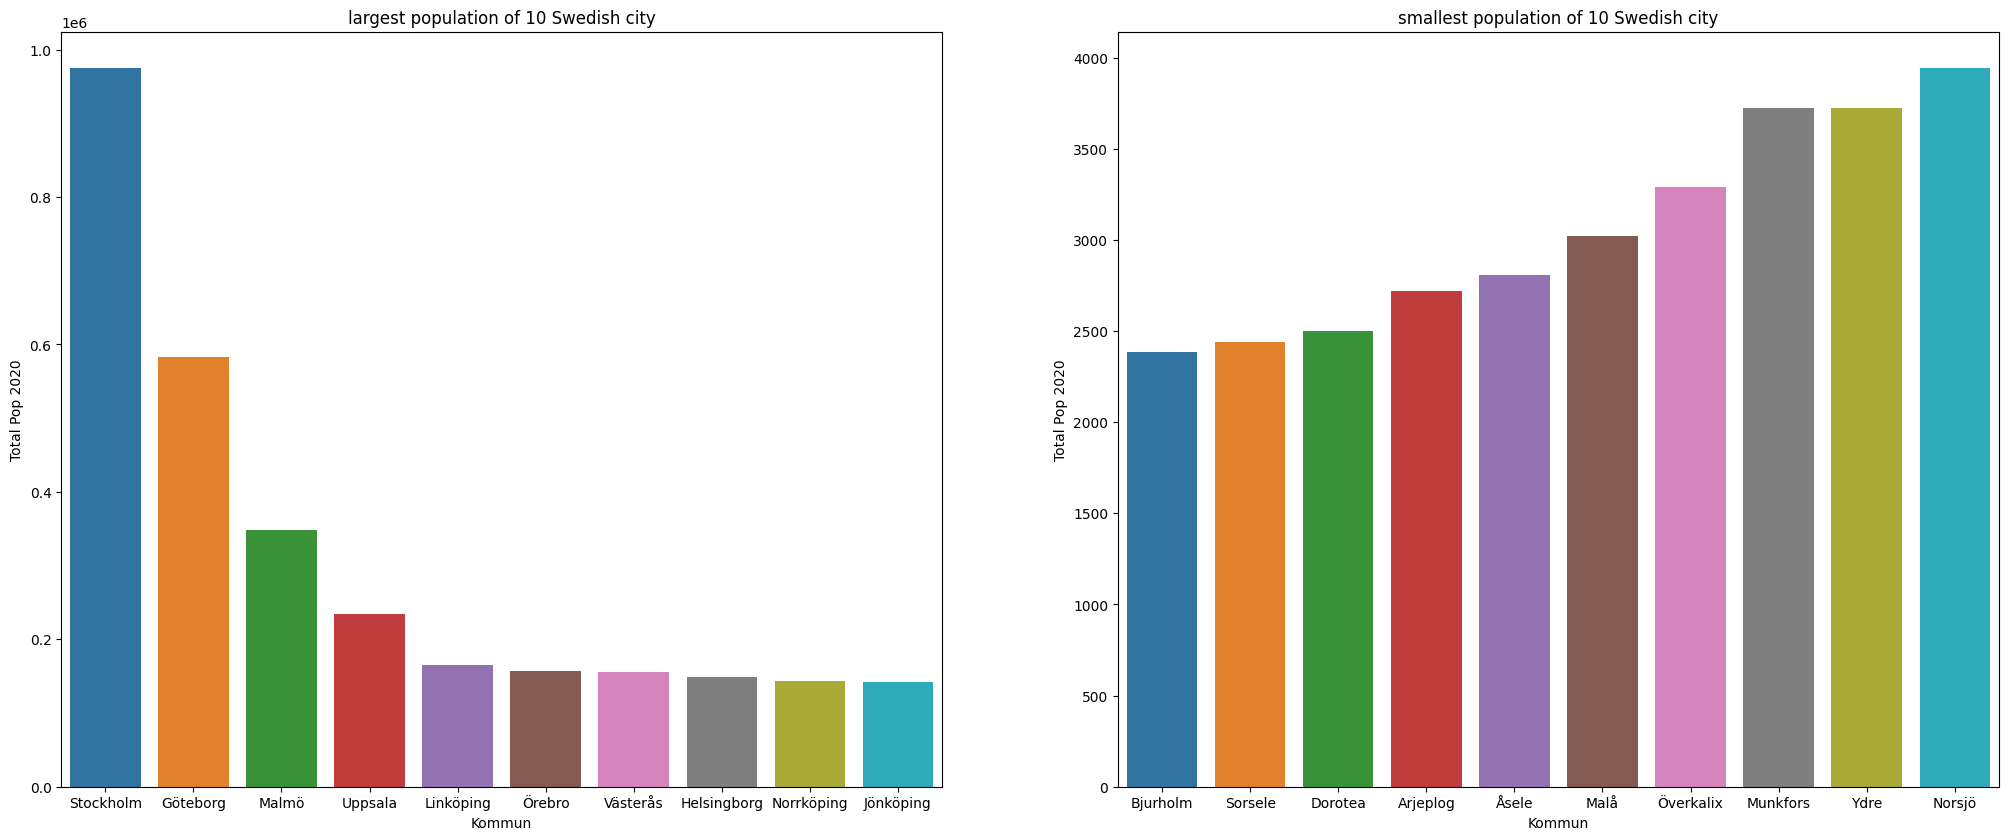

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,2,dpi=100,figsize=(25,10))

sns.barplot(data=largest_10, x="Kommun", y="Total Pop 2020", ax = ax[0]).set_title("largest population of 10 Swedish city")
sns.barplot(data=smallest_10, x="Kommun", y="Total Pop 2020", ax = ax[1]).set_title("smallest population of 10 Swedish city")

# f)

In [25]:
# Create a pie chart showing the total male and female population in Sweden 2020. (*)

# g)

In [26]:
# Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

# h)

In [27]:
# Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)

# i)

In [28]:
# i) Feel free to investigate other questions you are interested in using these datasets. (*), (**)

In [29]:
# pandas的DataFrame的append方法详细介
# pandas.DataFrame.append
# DataFrame.append(other, ignore_index=False, verify_integrity=False, sort=False)

In [30]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.arange(12).reshape(3, 4), columns=['A', 'B', 'C', 'D'])
df


,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


# dataframe 删除列

In [31]:
# DataFrame.drop(labels=None,axis=0, index=None, columns=None, inplace=False)
# labels 就是要删除的行列的名字，用列表给定
# axis 默认为0，指删除行，因此删除columns时要指定axis=1；
# index 直接指定要删除的行
# columns 直接指定要删除的列
# inplace=False，默认该删除操作不改变原数据，而是返回一个执行删除操作后的新dataframe；
# inplace=True，则会直接在原数据上进行删除操作，删除后无法返回。


In [32]:
# Drop columns 方法一
df.drop(['B', 'C'], axis=1)  # 删除列B和列C
# axis 默认为0，指删除行，因此删除columns时要指定axis=1；


,A,D
0,0,3
1,4,7
2,8,11


In [33]:
# Drop columns 方法二
df.drop(columns=['B', 'C'])

,A,D
0,0,3
1,4,7
2,8,11


# Drop rows 删除行

In [34]:
# Drop rows 删除行 方法一
df.drop([0, 1])  # 删除第一行和第二行

,A,B,C,D
2,8,9,10,11


In [35]:
# Drop rows 删除行 方法二
df.drop(index=[0, 1])  # 删除第一行和第二行

,A,B,C,D
2,8,9,10,11


# 删除指定的行 

In [36]:
# 删除指定的行
import pandas as pd
df = {'DataBase': ['mysql', 'test', 'test', 'test', 'test'],
      'table': ['user', 'student', 'course', 'sc', 'book']}
df = pd.DataFrame(df)
df

,DataBase,table
0,mysql,user
1,test,student
2,test,course
3,test,sc
4,test,book


In [37]:
#删除table值为sc的那一行
df.drop(index=(df.loc[(df['table']=='sc')].index))

,DataBase,table
0,mysql,user
1,test,student
2,test,course
4,test,book


In [38]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'), index=['x', 'y'])
df

,A,B
x,1,2
y,3,4


In [39]:
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'), index=['x', 'y'])
df2


,A,B
x,5,6
y,7,8


In [40]:
df.append(df2)  # 添加两行

,A,B
x,1,2
y,3,4
x,5,6
y,7,8


In [41]:
df.append(df2, ignore_index=True)  # 忽略index number


,A,B
0,1,2
1,3,4
2,5,6
3,7,8


In [42]:
pd.concat([pd.DataFrame([i], columns=['A']) for i in range(5)],  # i 是从0到4
          ignore_index=True)


,A
0,0
1,1
2,2
3,3
4,4
